preprocess

In [1]:
import numpy as np
from mne.io import read_raw
from mne.channels import make_standard_montage
from mne import make_fixed_length_epochs
from mne.preprocessing import ICA
from mne_icalabel import label_components
from autoreject import AutoReject
from mne import Report

Opening raw data file /Volumes/Extreme_SSD/payam_data/Tide_data/austin/10067_ses-1_rest_1.fif...
    Range : 0 ... 312703 =      0.000 ...   312.703 secs
Ready.
Reading 0 ... 312703  =      0.000 ...   312.703 secs...


/var/folders/20/hsy69tx529ndn3rkv5gzcf0c0000gn/T/ipykernel_1795/4154895966.py:9: RuntimeWarning: This filename (/Volumes/Extreme_SSD/payam_data/Tide_data/austin/10067_ses-1_rest_1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = read_raw(fname, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 3301 samples (3.301 s)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 30 events and 2500 original time points ...
0 bad epochs dropped
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/64 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/64 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/30 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/30 [00:00<?,       ?it/s]

  0%|          | Fold : 0/5 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/30 [00:00<?,       ?it/s]

  0%|          | Fold : 0/5 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/30 [00:00<?,       ?it/s]

  0%|          | Fold : 0/5 [00:00<?,       ?it/s]





Estimated consensus=0.70 and n_interpolate=8


  0%|          | Repairing epochs : 0/30 [00:00<?,       ?it/s]

Dropped 4 epochs: 2, 20, 21, 26
Fitting ICA to data using 64 channels (please be patient, this may take a while)
Selecting by explained variance: 57 components


/Users/payamsadeghishabestari/Tinnorm/venv/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:127: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


Fitting ICA took 62.7s.


/var/folders/20/hsy69tx529ndn3rkv5gzcf0c0000gn/T/ipykernel_1795/4154895966.py:43: RuntimeWarning: The provided ICA instance was fitted with a 'fastica' algorithm. ICLabel was designed with extended infomax ICA decompositions. To use the extended infomax algorithm, use the 'mne.preprocessing.ICA' instance with the arguments 'ICA(method='infomax', fit_params=dict(extended=True))' (scikit-learn) or 'ICA(method='picard', fit_params=dict(ortho=False, extended=True))' (python-picard).
  ic_labels = label_components(epochs_2, ica, method="iclabel")["labels"]


Applying ICA to Epochs instance
    Transforming to ICA space (57 components)
    Zeroing out 4 ICA components
    Projecting back using 64 PCA components
Embedding : jquery-3.6.0.min.js
Embedding : bootstrap.bundle.min.js
Embedding : bootstrap.min.css
Embedding : bootstrap-table/bootstrap-table.min.js
Embedding : bootstrap-table/bootstrap-table.min.css
Embedding : bootstrap-table/bootstrap-table-copy-rows.min.js
Embedding : bootstrap-table/bootstrap-table-export.min.js
Embedding : bootstrap-table/tableExport.min.js
Embedding : bootstrap-icons/bootstrap-icons.mne.min.css
Embedding : highlightjs/highlight.min.js
Embedding : highlightjs/atom-one-dark-reasonable.min.css


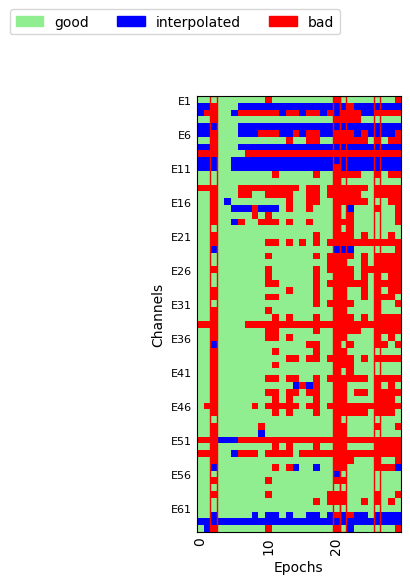

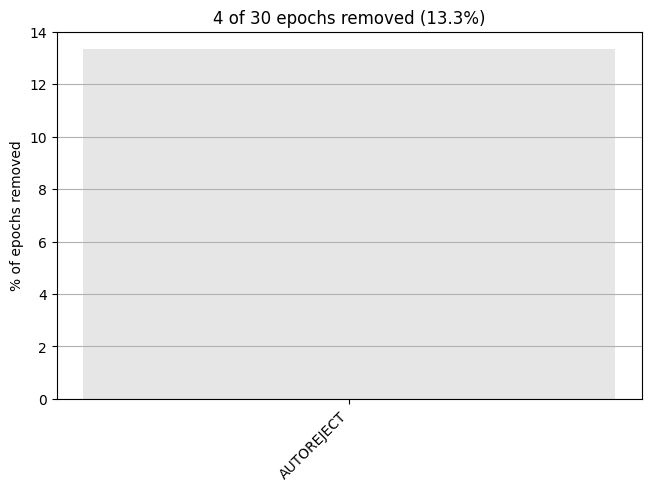

ValueError: No appropriate components found for the given picks ([])

In [ ]:
sfreq = 250.0
l_freq = 1.0
h_freq = 100.0
crop_duration = 5.0
epoch_duration = 10.0
overwrite = True

fname = "/Volumes/Extreme_SSD/payam_data/Tide_data/austin/10067_ses-1_rest_1.fif"
raw = read_raw(fname, preload=True)

raw.drop_channels(ch_names="VREF")
montage = make_standard_montage("GSN-HydroCel-64_1.0")
raw.set_montage(montage, match_case=False, on_missing="warn")

## preproc_1
raw.crop(tmin=crop_duration, tmax=raw.times[-1] - crop_duration)
raw.filter(l_freq=l_freq, h_freq=h_freq)
raw.resample(sfreq=sfreq)
raw.set_eeg_reference("average", projection=False)
epochs_1 = make_fixed_length_epochs(raw, duration=10, preload=True)
# epochs_1.save(fname_1, overwrite=overwrite)

## preproc_2
ar = AutoReject(
                n_interpolate=np.array([1, 4, 8]),
                consensus=np.linspace(0, 1.0, 11),
                cv=5,
                n_jobs=1,
                random_state=11,
                verbose=True
                )
ar.fit(epochs_1)
epochs_2, reject_log = ar.transform(epochs_1, return_log=True)

## preproc 3
ica = ICA(n_components=0.999, method='fastica')
try:
    ica.fit(epochs_2)
except:
    ica = ICA(n_components=5, method='fastica')
    ica.fit(epochs_2)

ic_labels = label_components(epochs_2, ica, method="iclabel")["labels"]
artifact_idxs = [idx for idx, label in enumerate(ic_labels) \
                if not label in ["brain", "other"]]
epochs_3 = ica.apply(epochs_2.copy(), exclude=artifact_idxs)

# epochs_ar.save(fname_save_3, overwrite=overwrite)

## create report
report = Report(title="10001")
## preproc_1
report.add_epochs(epochs=epochs_1, psd=False, title='Epochs_preproc1')

## preproc_2
fig_reject = reject_log.plot(show=False)
report.add_figure(fig=fig_reject, title="autoreject log", image_format="PNG")
fig_drop = epochs_2.plot_drop_log()
report.add_figure(fig=fig_drop, title="epochs drop log", image_format="PNG")

## preproc_3

report.add_ica(
    ica=ica,
    title="ICA cleaning",
    picks=artifact_idxs,
    inst=None,
    eog_evoked=None,
    eog_scores=None,
    n_jobs=None
)
report.save(fname="here.html", open_browser=False, overwrite=True)



Embedding : jquery-3.6.0.min.js
Embedding : bootstrap.bundle.min.js
Embedding : bootstrap.min.css
Embedding : bootstrap-table/bootstrap-table.min.js
Embedding : bootstrap-table/bootstrap-table.min.css
Embedding : bootstrap-table/bootstrap-table-copy-rows.min.js
Embedding : bootstrap-table/bootstrap-table-export.min.js
Embedding : bootstrap-table/tableExport.min.js
Embedding : bootstrap-icons/bootstrap-icons.mne.min.css
Embedding : highlightjs/highlight.min.js
Embedding : highlightjs/atom-one-dark-reasonable.min.css


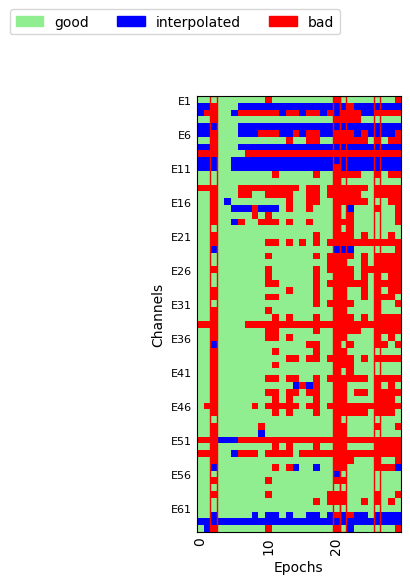

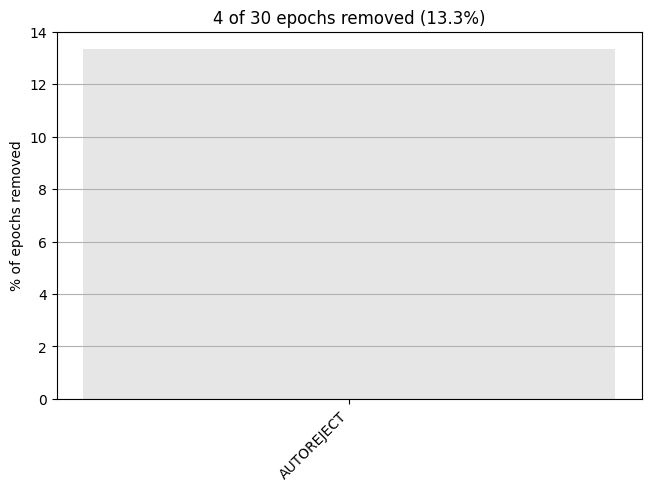

Saving report to : /Users/payamsadeghishabestari/Tinnorm/src/here.html


'/Users/payamsadeghishabestari/Tinnorm/src/here.html'

In [ ]:
report = Report(title="10001")
## preproc_1
report.add_epochs(epochs=epochs_1, psd=False, title='Epochs_preproc1')

## preproc_2
fig_reject = reject_log.plot(show=False)
report.add_figure(fig=fig_reject, title="autoreject log", image_format="PNG")
fig_drop = epochs_2.plot_drop_log()
report.add_figure(fig=fig_drop, title="epochs drop log", image_format="PNG")

## preproc_3

report.add_ica(
    ica=ica,
    title="ICA cleaning",
    picks=artifact_idxs,
    inst=None,
    eog_evoked=None,
    eog_scores=None,
    n_jobs=None
)
report.save(fname="here.html", open_browser=False, overwrite=True)

In [8]:
artifact_idxs

[2, 3, 23, 37]

In [ ]:


        if run_ica:
            if len(eog_indices) > 0:
                report.add_figure(fig=eog_components, title="EOG Components", image_format="PNG")
                logging.info(f"EOG components from ICA were added to report.")
        

In [ ]:
fname_report = subject_dir / "reports" / f"{paradigm}.h5"
        report = open_report(fname_report)
        report.add_epochs(epochs=epochs_concat, psd=False, title='Epochs')

        if raw.info["description"] in ["gpias", "omi", "xxxxx", "xxxxy"]:
            report.add_evokeds(evokeds)
        
        ## saving
        report.save(fname=fname_report.with_suffix('.html'), open_browser=False, overwrite=True)
    